## Pairs trading sample

## Cointegration and Trading Strategy Explanation

Cointegration is a statistical property of two or more time series, where they share a long-term equilibrium relationship despite short-term deviations. When two stock prices are cointegrated, it means that their linear combination will be stationary, even though the individual series may not be. This is useful in pairs trading, where we seek mean-reverting behavior between two stocks.

### Stationarity Check:
First, we check if each stock price series is **stationary**. A stationary time series has constant mean, variance, and autocovariance over time. Non-stationary data would show a trend or seasonality, which would invalidate many statistical models.

- **Augmented Dickey-Fuller (ADF) test** is commonly used for this.
- If both series are **non-stationary**, they need to be differenced (transformed) to become stationary.

### Cointegration Check:
After confirming stationarity, we test if the two stock prices are **cointegrated**. This is done using the **Engle-Granger two-step method** or the **Johansen test**. Cointegration means that the spread (error between the stocks) will revert to the mean over time.

### Error Correction & Mean Reversion:
Once cointegration is confirmed, the strategy is based on the error (spread) between the stocks. If one stock is overvalued compared to the other, we short the overvalued stock and go long on the undervalued stock. We then liquidate both positions when the spread reaches zero (the mean), and reverse the positions when the spread moves further away from the mean.

---


### Mathematical Explanation & Equations

In pairs trading, the **spread** between two cointegrated stocks can be expressed as a linear combination:

$$
Y_t = \beta X_t + \gamma
$$

Where:
- Coca-Cola is $( X_t )$ and Monster Beverage is $( Y_t )$.
- $( \beta )$ is the coefficient, and $( \gamma )$ is the constant derived from the cointegration relationship.
- $( X_t )$ and $( Y_t )$ are the stock prices at time $( t )$.

If the spread $( \epsilon_t = Y_t - (\beta X_t + \gamma))$ is **stationary** (i.e., mean-reverting), we can trade on deviations from the mean. The idea is that the error (or spread) between the two stocks will tend to revert to zero in the long run.

### Cointegration Test (Engle-Granger)

The cointegration relationship can be described by the following error correction model (ECM):

$$
\epsilon_t = Y_t - (\beta X_t + \gamma)
$$

Where $( \epsilon_t )$ is the **error term** or spread. If $( \epsilon_t )$ is stationary, we can assume the stocks are cointegrated, and we can use the error term for mean-reverting strategies.



### Trading Strategy:

1. **Entry Signal:**
   - If $( \epsilon_t )$ deviates by a certain threshold (e.g., 2 standard deviations), we enter a trade.
   - If $( \epsilon_t )$ is positive (i.e., $( Y_t > (\beta Y_t + \gamma))$), we short $( Y_t )$ and go long $( X_t )$.
   - If $( \epsilon_t )$ is negative (i.e., $( Y_t < (\beta Y_t + \gamma))$), we long $( Y_t )$ and short $( X_t )$.

2. **Exit Signal:**
   - We liquidate positions when $( \epsilon_t )$ returns to the mean, i.e., when $( \epsilon_t \approx 0 )$.
   
3. **Reversal:**
   - If the spread moves further from the mean (e.g., hits a threshold below the mean), reverse the positions to capture further reversion.


In this example, we will test for cointegration between some soda companies. After confirming cointegration, we will use the spread of a sample pair for a mean-reversion strategy.

## Code

In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


#Download the data using y finance

tickers = ["KO", "PEP", "KDP", "MNST", "FIZZ", "JSDA"]

# Download data for the past 5 years
data = yf.download(tickers, start="2010-01-01", end="2025-01-01", group_by='ticker')



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


In [3]:
#get the closings
closings=[]
missing_time=[]
for tick in tickers:
  close = np.array(list(data[tick]['Close']))
  missing_time.append(np.where(np.isnan(close)))
  closings.append(close)
closings=np.array(closings)

In [4]:
#check for NaNs
for ii in range(len(tickers)):
  print(np.isnan(closings[ii]).any())

False
False
False
False
False
False


Text(0, 0.5, '$')

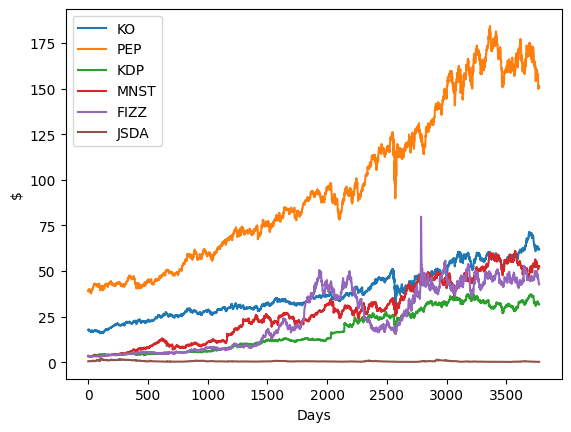

In [5]:
#plot the closing prices

for i in range(len(closings)):
  plt.plot(closings[i], label=tickers[i]);
plt.legend()
plt.xlabel('Days')
plt.ylabel('$')


In [6]:
# check for stationarity using the ADF test and KPSS

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
non_stationary = []
for i in range(len(closings)):
  # result_kpss = kpss(closings[i], regression='c')
  result_kpss = kpss(closings[i])
  result_adf = adfuller(closings[i])
  if (result_kpss[1]<=.05) and (result_adf[1]>.05):
    non_stationary.append(1)
  else:
    non_stationary.append(0)


<ipython-input-6-b41f3677c3fc>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(closings[i])
<ipython-input-6-b41f3677c3fc>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(closings[i])
<ipython-input-6-b41f3677c3fc>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(closings[i])
<ipython-input-6-b41f3677c3fc>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(closings[i])
<ipython-input-6-b41f3677c3fc>:8: InterpolationWarning: The 

In [7]:
print('Non stationary tickers: ')
print(np.array(tickers)[np.where(non_stationary)])
closings_non_stationary = closings[np.where(non_stationary)]


Non stationary tickers: 
['KO' 'PEP' 'KDP' 'MNST' 'FIZZ' 'JSDA']


In [8]:
#now test for cointegration with all pairs
from itertools import combinations
from statsmodels.tsa.stattools import coint

cointegrated_pairs = []
threshold = 0.05  # p-value cutoff
p_values = np.ones((6,6))
for i in range(len(closings_non_stationary)):
  for j in range(len(closings_non_stationary)):
    if i!=j:

      score, pval, _ = coint(closings_non_stationary[i], closings_non_stationary[j])
      if pval < threshold:
          cointegrated_pairs.append((i, j, pval))
      p_values[i,j]=pval

In [9]:
range(len(tickers))

range(0, 6)

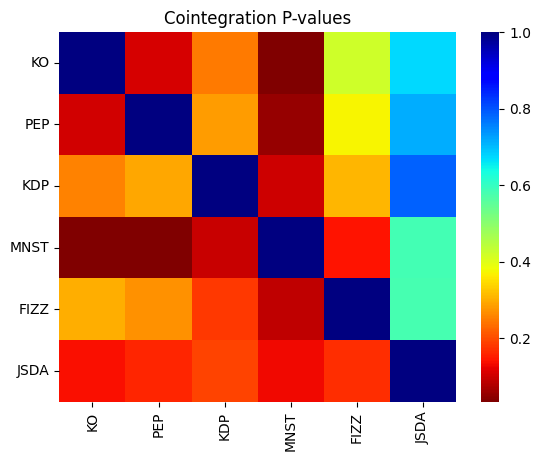

In [10]:
import seaborn as sns

sns.heatmap(p_values, cmap='jet_r')


plt.xticks(ticks=np.linspace(.5,5.5,6), labels=tickers, rotation=90)
plt.yticks(ticks=np.linspace(.5,5.5,6), labels=tickers, rotation=0)
plt.title('Cointegration P-values')

plt.show()

In [11]:
for i in range(len(cointegrated_pairs)):
  print(tickers[cointegrated_pairs[i][0]], tickers[cointegrated_pairs[i][1]])
  print('p-value: ', cointegrated_pairs[i][2])
  print('\n')

KO MNST
p-value:  0.03530787526976229


MNST KO
p-value:  0.034058557850536686


MNST PEP
p-value:  0.0362345536103715




In [12]:
#Lets just look at one pair KO and MNST
import statsmodels.api as sm

# Assuming you have the 'KO' and 'MNST' series
ko = closings_non_stationary[0]
mnst = closings_non_stationary[3]

# OLS regression to get the hedge ratio (beta)
model = sm.OLS(mnst, sm.add_constant(ko)).fit()

# Print the model summary to get the coefficients (intercept and slope)
print(model.summary())

# Hedge ratio (slope from the regression)
beta = model.params[1]

# Compute the spread: spread = MNST - beta * KO
spread = mnst - beta * ko

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.839e+04
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        06:50:44   Log-Likelihood:                -11397.
No. Observations:                3774   AIC:                         2.280e+04
Df Residuals:                    3772   BIC:                         2.281e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5925      0.243    -72.510      0.0

In [13]:
adfuller(spread)[1]

np.float64(0.008490042479473478)

In [14]:
from statsmodels.tsa.stattools import adfuller

# ADF test on the spread
result = adfuller(spread)  # drop NaN values (if any)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpret results
if result[1] < 0.05:
    print("The spread is stationary (reject null hypothesis).")
else:
    print("The spread is not stationary (fail to reject null hypothesis).")

ADF Statistic: -3.480949575060042
p-value: 0.008490042479473478
The spread is stationary (reject null hypothesis).


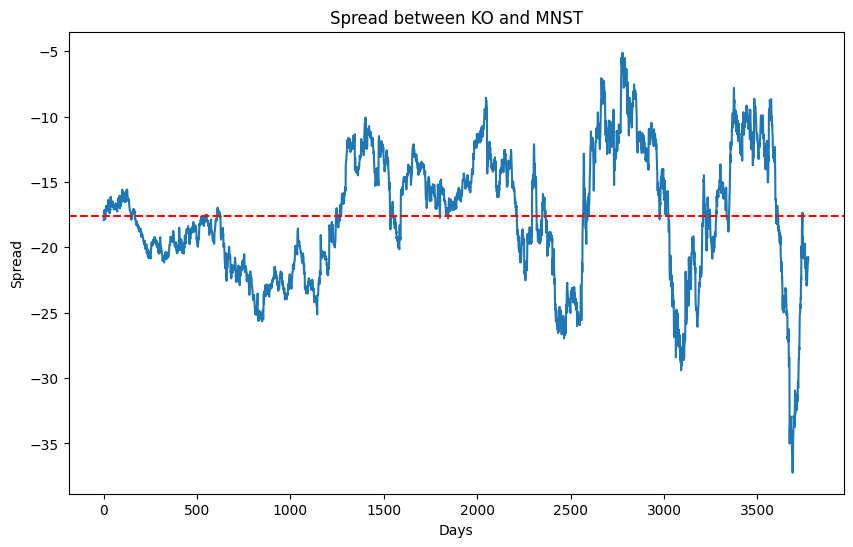

In [15]:
import matplotlib.pyplot as plt

# Plot the spread
plt.figure(figsize=(10, 6))
plt.plot(spread,)
plt.title("Spread between KO and MNST")
plt.axhline(y=np.mean(spread), color='r', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Spread')
plt.show()


This is the important plot. It is the z scored errors from the linear fit between the two stocks (spread). you can adjust the strategy so that when it crosses 2 stds you buy and when it hits the mean (Z==0) you liquidate.

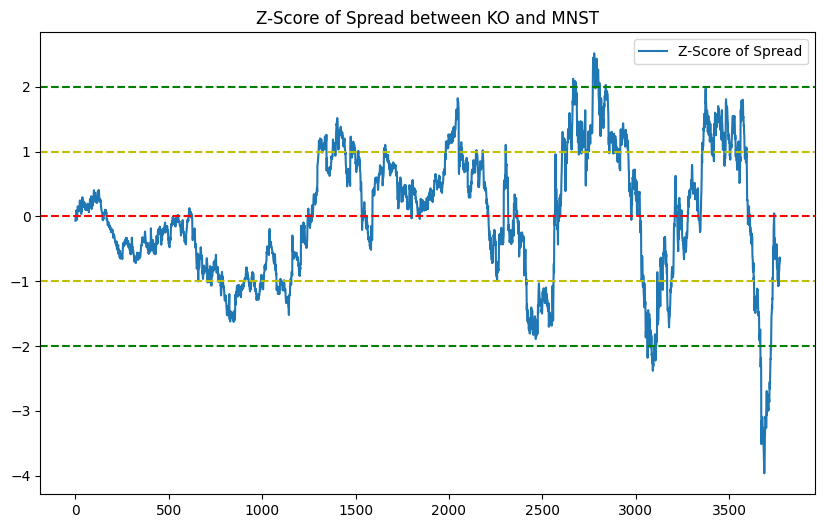

In [16]:
# Rolling window size
window = 100


spread_mean = np.mean(spread)
spread_std = np.std(spread)

# Compute z-score
z_score = (spread - spread_mean) / spread_std  # Adjust to match lengths

# Plot z-score
plt.figure(figsize=(10, 6))
plt.plot(z_score, label="Z-Score of Spread")
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='g', linestyle='--')  # Optional: signal threshold for trade
plt.axhline(y=-2, color='g', linestyle='--')  # Optional: signal threshold for trade
plt.axhline(y=-1, color='y', linestyle='--')  # Optional: signal threshold for trade
plt.axhline(y=1, color='y', linestyle='--')  # Optional: signal threshold for trade
plt.title("Z-Score of Spread between KO and MNST")
plt.legend()
plt.show()


Backtesting strategy based on the spread.

Total trades: 3
Win rate: 100.00%


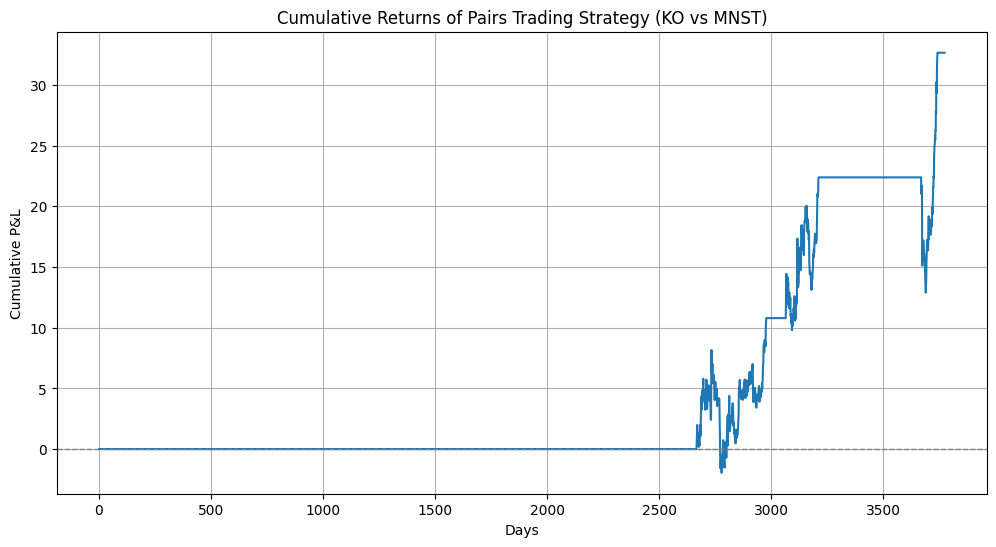

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure spread is a Series
spread_series = pd.Series(spread)

spread_mean = np.mean(spread)
spread_std = np.std(spread)
z_score = (spread_series - spread_mean) / spread_std

# Trading logic: enter at ±2, exit at 0
positions = []
trades = []
position = 0
entry_price = 0

for i, z in enumerate(z_score):
    if position == 0:
        if z > 2:
            position = -1  # Short spread
            entry_price = spread_series.iloc[i]
        elif z < -2:
            position = 1   # Long spread
            entry_price = spread_series.iloc[i]
    elif position == -1 and z < 0:
        exit_price = spread_series.iloc[i]
        pnl = entry_price - exit_price  # Short: sell high, buy low
        trades.append(pnl)
        position = 0
    elif position == 1 and z > 0:
        exit_price = spread_series.iloc[i]
        pnl = exit_price - entry_price  # Long: buy low, sell high
        trades.append(pnl)
        position = 0
    positions.append(position)

positions = pd.Series(positions, index=spread_series.index)

# Calculate P&L
spread_diff = spread_series.diff()
strategy_returns = positions.shift(1) * spread_diff
cumulative_returns = strategy_returns.cumsum()

# Trade statistics
total_trades = len(trades)
winning_trades = sum(1 for t in trades if t > 0)
win_rate = winning_trades / total_trades if total_trades > 0 else 0

# Display stats
print(f"Total trades: {total_trades}")
print(f"Win rate: {win_rate:.2%}")

# Plot it
plt.figure(figsize=(12, 6))
cumulative_returns.plot(title="Cumulative Returns of Pairs Trading Strategy (KO vs MNST)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Days")
plt.ylabel("Cumulative P&L")
plt.grid()
plt.show()


In [18]:
#adjust the strategy to take position at 1 std

Total trades: 10
Win rate: 100.00%


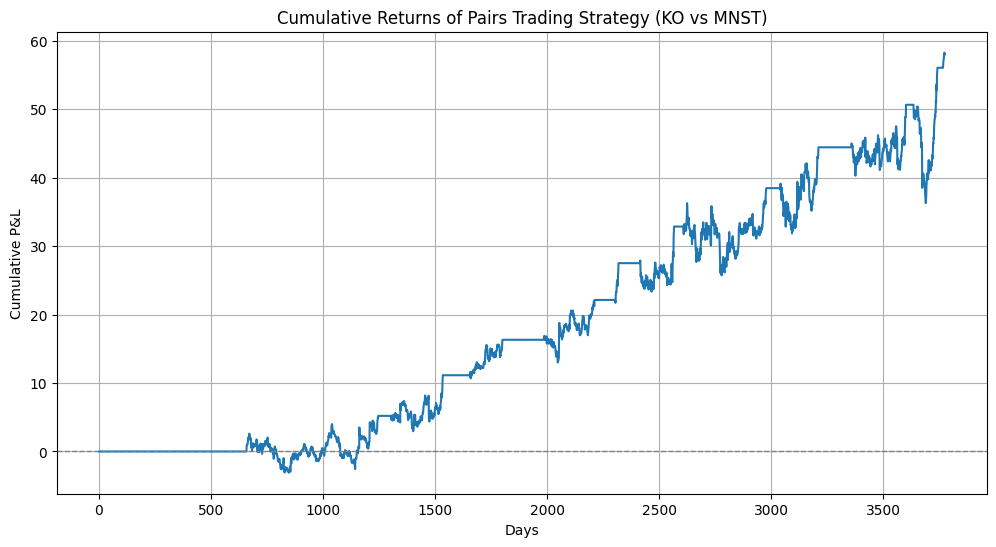

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure spread is a Series
spread_series = pd.Series(spread)

spread_mean = np.mean(spread)
spread_std = np.std(spread)
z_score = (spread_series - spread_mean) / spread_std

# Trading logic: enter at ±1, exit at 0
positions = []
trades = []
position = 0
entry_price = 0

for i, z in enumerate(z_score):
    if position == 0:
        if z > 1:
            position = -1  # Short spread
            entry_price = spread_series.iloc[i]
        elif z < -1:
            position = 1   # Long spread
            entry_price = spread_series.iloc[i]
    elif position == -1 and z < 0:
        exit_price = spread_series.iloc[i]
        pnl = entry_price - exit_price  # Short: sell high, buy low
        trades.append(pnl)
        position = 0
    elif position == 1 and z > 0:
        exit_price = spread_series.iloc[i]
        pnl = exit_price - entry_price  # Long: buy low, sell high
        trades.append(pnl)
        position = 0
    positions.append(position)

positions = pd.Series(positions, index=spread_series.index)

# Calculate P&L
spread_diff = spread_series.diff()
strategy_returns = positions.shift(1) * spread_diff
cumulative_returns = strategy_returns.cumsum()

# Trade statistics
total_trades = len(trades)
winning_trades = sum(1 for t in trades if t > 0)
win_rate = winning_trades / total_trades if total_trades > 0 else 0

# Display stats
print(f"Total trades: {total_trades}")
print(f"Win rate: {win_rate:.2%}")

# Plot it
plt.figure(figsize=(12, 6))
cumulative_returns.plot(title="Cumulative Returns of Pairs Trading Strategy (KO vs MNST)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Days")
plt.ylabel("Cumulative P&L")
plt.grid()
plt.show()
